<b> Loyd Flores </b> : <i> 24101949 </i> <br>
CSCI 325 : <i> Dr. Chialing Tsai </i> <br> 
Homework #1

In [14]:
# Import Statements
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer, load_digits
import time

# Images
from IPython.display import Image
question_1 = Image(filename="./images/Question_1.png")
question_2 = Image(filename="./images/Question_2.png")
question_3 = Image(filename="./images/Question_3.png")


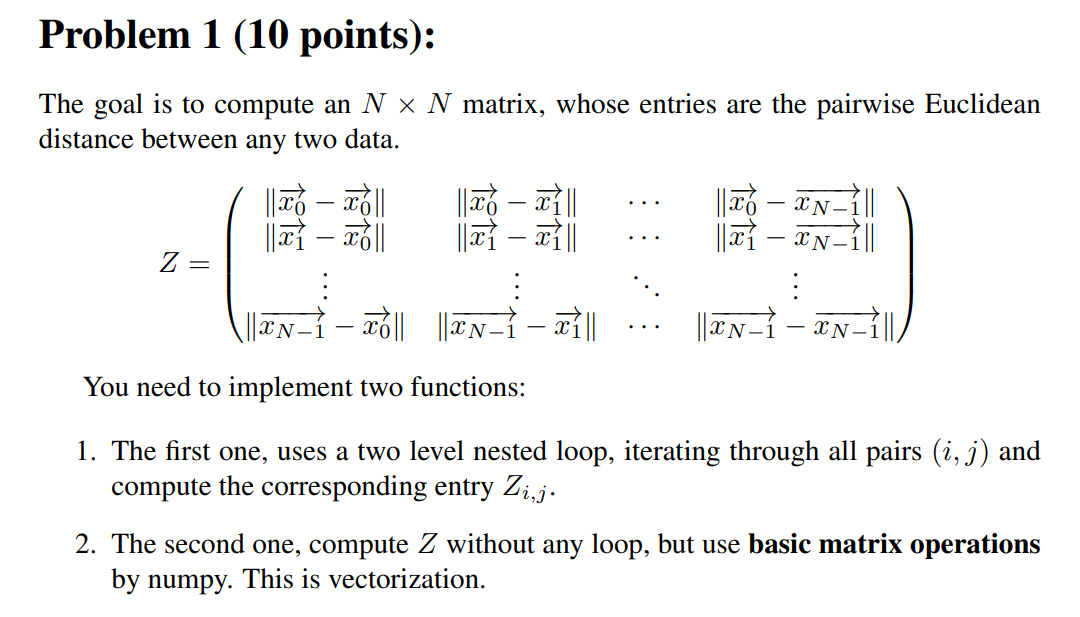

In [15]:
display(question_1)

<b> 1.1 </b> <br>
The first one, uses a two level nested loop, iteerating through all pairs (i, j) and compute the corresponding entry Z_i,j

In [16]:
def compute_distance_naive(X):
    N = X.shape[0]      # num of rows
    D = X[0].shape[0]   # num of cols
    
    M = np.zeros([N,N]) # instantiate an array of size N  (# rows) 
    for i in range(N):
        for j in range(N): # loop through all the pairs
            xi = X[i,:]
            xj = X[j,:]
            dist = np.sqrt(np.sum((xi - xj)**2))  # Euclidean distance formula  
            M[i,j] = dist                         # Store distance 

    return M

<b><u> Algorithm Explanation </u></b> <br>

<b> Input: </b> <br>
Matrix X of shape (r,c). r = # of rows/data points; c = # of features/columns <br>

<b> Process: </b> 
<ol>
    <li> Iterate through (for loop) each pair of rows, to compute distances for all pairs (i, j). </li>
    <li> Subtract the correspondiing feature value from x_i and x_j</li>
    <li> square the differences, sum them up across all features, and take the square root of this sum to compute the euclidean distance between two points </li>
    <li> Store the result in matrix M </li>
    <li> Repeat for every pair </li>
</ol>

<b> Result: </b>
The output will be a matrix M of shape (r,r), where each entry M_i,j contains the Euclidean distance between each point

<b> 1.2 </b> </br>
The second one, compute Z without any loop, but use basic matrix operations by numpy. This is vectorization

In [17]:
def compute_distance_smart(X):
    # Step 1: Compute the squared norms of each row | (Sum of squares along axis 1)
    squared_norms = np.sum(X ** 2, axis=1)  # Shape: (N,)

    # Step 2: Compute the dot product of X with its transpose
    dot_product = np.dot(X, X.T)  # Shape: (N, N)

    # Step 3: Use the squared distance formula | Compute norms and dot product for the entire matrix
    dist_squared = squared_norms[:, None] + squared_norms[None, :] - 2 * dot_product

    # Fix: Clip small negative values to zero due to floating-point precision errors
    dist_squared = np.clip(dist_squared, 0, None)

    # Step 4: Take the square root to get Euclidean distance
    M = np.sqrt(dist_squared)

    return M


<b><u> Algorithm Explanation </u></b> <br>

<b> Input: </b> <br>
Matrix X of shape (r,c). r = # of rows/data points; c = # of features/columns <br>

<b> Process: </b> 
<ol>
    <li> Compute the squared norms of each row of X. The squared norm of each data point x_i is calculated as the sum of squares of its components. This gives a vector of squared norms of shape (r, ), r = # cols</li>
    <li> Compute the dot product of X with its transpose (X^T). This results in a matrix of shape (r, r), where each entry represents the dot product between two data points</li>
    <li> Use the squared Euclidean distance form,ula to compute the pairwise distances </li>
    <li> Take the square root of the resulting matrix to obtain the Euclidean Distances</li>
</ol>

<b> Result: </b>
The output will be a matrix M of shape (r,r), where each entry M_i,j contains the Euclidean distance between each point

In [18]:
def compare_functions(func1, func2, min_cols=10, max_cols=140, step=10, trials=10):
    """
    Compares the performance of two functions on randomly generated matrices.
    
    Args:
    - func1: First function to compare.
    - func2: Second function to compare.
    - min_cols: Minimum number of columns in the matrix.
    - max_cols: Maximum number of columns in the matrix.
    - step: Step size for increasing the matrix size.
    - trials: Number of trials to run for each matrix size.
    
    The function generates matrices of varying size, measures the execution time
    for both input functions, and plots the results.
    """
    # Define the range of columns (N), and set up storage for results
    params = range(min_cols, max_cols + 1, step)
    nparams = len(params)
    
    # Store execution times for each function
    perf_func1 = np.zeros([trials, nparams])  # 10 trials, each parameter is a column
    perf_func2 = np.zeros([trials, nparams])
    
    counter = 0
    
    for ncols in params:
        nrows = ncols * 10  # Define matrix rows
        
        print(f"Testing matrix size: {nrows} rows, {ncols} columns")
        
        for i in range(trials):
            # Generate random matrix
            X = np.random.rand(nrows, ncols)
            
            # Time function 1 (func1)
            st = time.time()
            _ = func1(X)
            et = time.time()
            perf_func1[i, counter] = et - st  # Store time difference
            
            # Time function 2 (func2)
            st = time.time()
            _ = func2(X)
            et = time.time()
            perf_func2[i, counter] = et - st  # Store time difference
        
        counter += 1
    
    # Compute mean and standard deviation of execution times
    mean_func1 = np.mean(perf_func1, axis=0)
    mean_func2 = np.mean(perf_func2, axis=0)
    std_func1 = np.std(perf_func1, axis=0)
    std_func2 = np.std(perf_func2, axis=0)
    
    # Plot the results
    plt.figure()
    plt.errorbar(params, mean_func1, yerr=std_func1, color='red', label='Function 1')
    plt.errorbar(params, mean_func2, yerr=std_func2, color='blue', label='Function 2')
    plt.xlabel('Number of Columns of the Matrix')
    plt.ylabel('Running Time (Seconds)')
    plt.title('Performance Comparison of Two Functions')
    plt.legend()
    plt.show()

# Example usage (assuming compute_distance_naive and compute_distance_smart are already defined):
# compare_functions(compute_distance_naive, compute_distance_smart)


Testing matrix size: 100 rows, 10 columns
Testing matrix size: 200 rows, 20 columns
Testing matrix size: 300 rows, 30 columns
Testing matrix size: 400 rows, 40 columns
Testing matrix size: 500 rows, 50 columns
Testing matrix size: 600 rows, 60 columns
Testing matrix size: 700 rows, 70 columns
Testing matrix size: 800 rows, 80 columns
Testing matrix size: 900 rows, 90 columns
Testing matrix size: 1000 rows, 100 columns


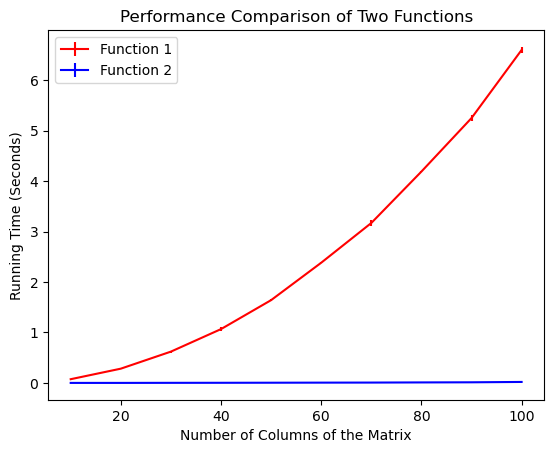

In [19]:
compare_functions(compute_distance_naive, compute_distance_smart, min_cols=10, max_cols=100, step=10, trials=5)

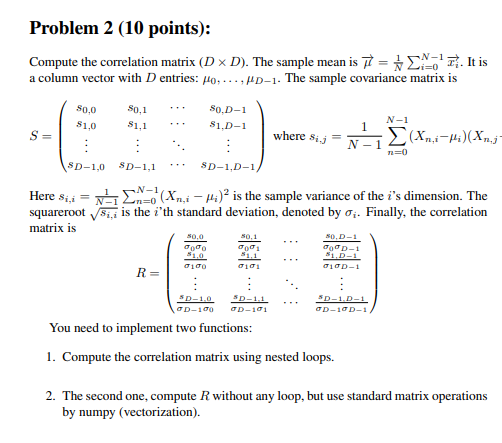

In [20]:
display(question_2)

<b> 2.1 </b> <br>
Compute the correlation matrix using nested loops

In [21]:
def compute_correlation_naive(X):
    N = X.shape[0]        # num of rows
    D = X[0].shape[0]     # num of cols

    # use X to create M
    M = np.zeros([D, D])  # create a (column x column) correlation matrix

    for i in range(D):
        for j in range(D):
            xi = X[:, i]
            xj = X[:, j]

            '''
            Pearson correlation formula:
                r_ij = Σ((x_i - mean(x_i)) * (x_j - mean(x_j))) / sqrt(Σ((x_i - mean(x_i))^2) * Σ((x_j - mean(x_j))^2))

            Where:
                x_i and x_j are the data points for the two variables,    
                mean(x_i) and mean(x_j) are the means of the respective variables,
                r_ij is the correlation coefficient between variables x_i and x_j.
            '''

            # Step 1: Calculate the means of xi and xj
            mean_xi = np.mean(xi)
            mean_xj = np.mean(xj)

            # Step 2: Calculate derivations from the mean 
            xi_dev = xi - mean_xi 
            xj_dev = xj - mean_xj 

            # Step 3: Calculate the correlation coefficient (Pearson)
            numerator = np.sum(xi_dev * xj_dev)
            denominator = np.sqrt(np.sum(xi_dev ** 2) * np.sum(xj_dev ** 2))

            # Step 4: Avoid division by zero in case of constant vectors
            corr = numerator / denominator if denominator != 0 else 0
            
            # you have to change it to correlation between xi and xj
            M[i, j] = corr

    return M

<b><u> Algorithm Explanation </u></b> <br>

<b> Input: </b> <br>
Matrix X of shape (r,c). r = # of rows/data points; c = # of features/columns <br>

<b> Process: </b> 
<ol>
    <li> Calculate Means. For each pair of columns x_i, x_j, compute their respective means. </li>
    <li> For each column x_i, calculate the deviation of each value from its mean, x_i - mean(x_i). This deviation is used to center the data and quantifyt how much eeach value differs from the average</li>
    <li> Compute the numerator for Pearson correlation coefficient, which is the sum of the product deviations</li>
        <ul> 
            <li>Compute the numerator for the Pearson correlation coefficient, which is the sum of the product of deviations: <br>
            <b><u>numerator </b></u>= ∑((xᵢ - mean(xᵢ)) × (xⱼ - mean(xⱼ))) </li> <br>
            <li> Compute the denominator is the product of the square roots of the sum of squared deviations for each column, representing the normalization factor: <br><b><u> denominator </b></u> = √(∑((xᵢ - mean(xᵢ))²) × ∑((xⱼ - mean(xⱼ))²)) </li>
        </ul>
    <li> numerator/denominator obtains the correlation of each column</li>

            


            
</ol>

<b> Result: </b>
The output is a correlation matrix 𝑀 of shape (c,c) where each entry M_i,j contains the pearson correlation coerfficient between columns x_i and x_j. Diagonal entries (correlation to self) are always 1.

<b> 2.2 </b> <br>
Compute the correlation matrix using nested loops

In [22]:
def compute_distance_smart(X):
    # Step 1: Compute the squared norms of each row | (Sum of squares along axis 1)
    squared_norms = np.sum(X ** 2, axis=1)  # Shape: (N,)

    # Step 2: Compute the dot product of X with its transpose
    dot_product = np.dot(X, X.T)  # Shape: (N, N)

    # Step 3: Use the squared distance formula | Compute norms and dot product for the entire matrix
    dist_squared = squared_norms[:, None] + squared_norms[None, :] - 2 * dot_product

    # Fix: Clip small negative values to zero due to floating-point precision errors
    dist_squared = np.clip(dist_squared, 0, None)

    # Step 4: Take the square root to get Euclidean distance
    M = np.sqrt(dist_squared)

    return M

# third function to fill, compute correlation matrix using loops
def compute_correlation_naive(X):
    N = X.shape[0]        # num of rows
    D = X[0].shape[0]     # num of cols

    # use X to create M
    M = np.zeros([D, D])  # create a (column x column) correlation matrix

    for i in range(D):
        for j in range(D):
            xi = X[:, i]
            xj = X[:, j]

            '''
            Pearson correlation formula:
                r_ij = Σ((x_i - mean(x_i)) * (x_j - mean(x_j))) / sqrt(Σ((x_i - mean(x_i))^2) * Σ((x_j - mean(x_j))^2))

            Where:
                x_i and x_j are the data points for the two variables,    
                mean(x_i) and mean(x_j) are the means of the respective variables,
                r_ij is the correlation coefficient between variables x_i and x_j.
            '''

            # Step 1: Calculate the means of xi and xj
            mean_xi = np.mean(xi)
            mean_xj = np.mean(xj)

            # Step 2: Calculate derivations from the mean 
            xi_dev = xi - mean_xi 
            xj_dev = xj - mean_xj 

            # Step 3: Calculate the correlation coefficient (Pearson)
            numerator = np.sum(xi_dev * xj_dev)
            denominator = np.sqrt(np.sum(xi_dev ** 2) * np.sum(xj_dev ** 2))

            # Step 4: Avoid division by zero in case of constant vectors
            corr = numerator / denominator if denominator != 0 else 0
            
            # you have to change it to correlation between xi and xj
            M[i, j] = corr

    return M

<b><u>Algorithm Explanation</u></b>

<b>Input:</b>
Matrix X of shape (r, c).
r = # of rows/data points;
c = # of features/columns.

<b>Process:</b>

<ol> 
    <li> First, calculate the squared length (squared norms) of each data point by summing the squares of its feature values. This gives a measure of how "far" each point is from the origin in feature space. </li> 
    <li> Next, compute the similarity between pairs of data points by calculating the inner product (dot product) of each pair. This provides information about how aligned the two data points are in feature space. </li> 
    <li> Use a mathematical formula to compute the squared distance between every pair of data points. This is done by combining the squared norms and the dot products in such a way that it gives the squared Euclidean distance between points. </li> 
    <li> Finally, take the square root of the computed distances to get the actual Euclidean distance between every pair of data points. Handle any small numerical errors that might arise due to floating-point precision. </li> </ol>
<b>Result:</b> <br>
The output is a correlation matrix 𝑀 of shape (c,c) where each entry M_i,j contains the pearson correlation coerfficient between columns x_i and x_j. Diagonal entries (correlation to self) are always 1.

In [23]:
def compute_correlation_smart(X):
    # Center the data by subtracting the mean of each column
    X_centered = X - np.mean(X, axis=0)
    
    # Compute the covariance matrix
    cov_matrix = np.dot(X_centered.T, X_centered) / (X.shape[0] - 1)
    
    # Compute the standard deviation for each column
    std_devs = np.std(X, axis=0, ddof=1)
    
    # Compute the correlation matrix
    M = cov_matrix / np.outer(std_devs, std_devs)
    
    return M

Testing matrix size: 100 rows, 10 columns
Testing matrix size: 200 rows, 20 columns
Testing matrix size: 300 rows, 30 columns
Testing matrix size: 400 rows, 40 columns
Testing matrix size: 500 rows, 50 columns
Testing matrix size: 600 rows, 60 columns
Testing matrix size: 700 rows, 70 columns
Testing matrix size: 800 rows, 80 columns
Testing matrix size: 900 rows, 90 columns
Testing matrix size: 1000 rows, 100 columns


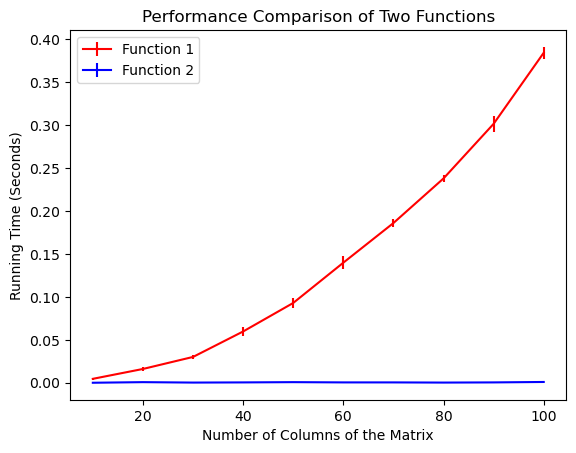

In [24]:
compare_functions(compute_correlation_naive, compute_correlation_smart, min_cols=10, max_cols=100, step=10, trials=5)

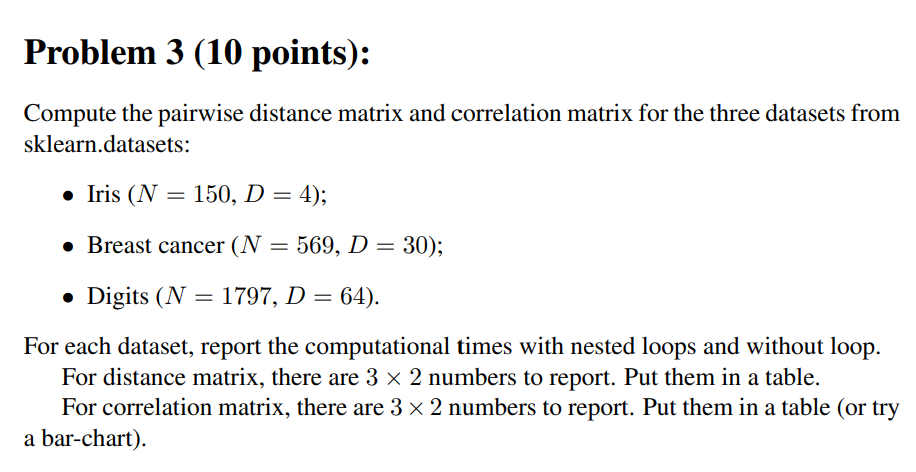

In [25]:
display(question_3)

In [26]:
# Load datasets
iris_df = load_iris().data
breast_cancer_df = load_breast_cancer().data
digits_df = load_digits().data
print("Datasets loaded ...")

Datasets loaded ...


In [28]:
shape_iris = iris_df.shape
shape_breast_cancer = breast_cancer_df.shape
shape_digits = digits_df.shape

print(f"Iris Shape: {shape_iris}")
print(f"Breast Cancer: {shape_breast_cancer}")
print(f"Digits: {shape_digits}")


Iris Shape: (150, 4)
Breast Cancer: (569, 30)
Digits: (1797, 64)


In [29]:
def measure_time(func, dataset, description):
    """Utility function to measure execution time of a given function."""
    start_time = time.time()
    func(dataset)
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Time for {description}: {elapsed_time:.6f} seconds")
    return elapsed_time

In [32]:
# Measure times for Iris dataset
print("Measuring time using Iris Dataset ...")
iris_naive_distance_time = measure_time(compute_distance_naive, iris_df, "naive distance on Iris")
iris_smart_distance_time = measure_time(compute_distance_smart, iris_df, "smart distance on Iris")
iris_naive_corr_time = measure_time(compute_correlation_naive, iris_df, "naive correlation on Iris")
iris_smart_corr_time = measure_time(compute_correlation_smart, iris_df, "smart correlation on Iris")

Measuring time using Iris Dataset ...
Time for naive distance on Iris: 0.150503 seconds
Time for smart distance on Iris: 0.000000 seconds
Time for naive correlation on Iris: 0.000000 seconds
Time for smart correlation on Iris: 0.000999 seconds


In [34]:
# Measure times for Breast Cancer dataset
print("Measuring time using Breast Cancer Dataset ...")
breast_naive_distance_time = measure_time(compute_distance_naive, breast_cancer_df, "naive distance on Breast Cancer")
breast_smart_distance_time = measure_time(compute_distance_smart, breast_cancer_df, "smart distance on Breast Cancer")
breast_naive_corr_time = measure_time(compute_correlation_naive, breast_cancer_df, "naive correlation on Breast Cancer")
breast_smart_corr_time = measure_time(compute_correlation_smart, breast_cancer_df, "smart correlation on Breast Cancer")

Measuring time using Breast Cancer Dataset ...
Time for naive distance on Breast Cancer: 2.103430 seconds
Time for smart distance on Breast Cancer: 0.003998 seconds
Time for naive correlation on Breast Cancer: 0.038075 seconds
Time for smart correlation on Breast Cancer: 0.000999 seconds


In [35]:
# Measure times for Digits dataset
print("Measuring time using Digits Dataset")
digits_naive_distance_time = measure_time(compute_distance_naive, digits_df, "naive distance on Digits")
digits_smart_distance_time = measure_time(compute_distance_smart, digits_df, "smart distance on Digits")
digits_naive_corr_time = measure_time(compute_correlation_naive, digits_df, "naive correlation on Digits")
digits_smart_corr_time = measure_time(compute_correlation_smart, digits_df, "smart correlation on Digits")

Measuring time using Digits Dataset
Time for naive distance on Digits: 21.136841 seconds
Time for smart distance on Digits: 0.059115 seconds
Time for naive correlation on Digits: 0.180470 seconds
Time for smart correlation on Digits: 0.001001 seconds


C:\Users\usflo\AppData\Local\Temp\ipykernel_17612\972890084.py:12: RuntimeWarning: invalid value encountered in divide
  M = cov_matrix / np.outer(std_devs, std_devs)


In [36]:
# Organize the times into a table
print("\nComputation Times (in seconds):")
print(f"{'Dataset':<15}{'Naive Distance':<20}{'Smart Distance':<20}{'Naive Correlation':<20}{'Smart Correlation':<20}")
print(f"{'Iris':<15}{iris_naive_distance_time:<20.6f}{iris_smart_distance_time:<20.6f}{iris_naive_corr_time:<20.6f}{iris_smart_corr_time:<20.6f}")
print(f"{'Breast Cancer':<15}{breast_naive_distance_time:<20.6f}{breast_smart_distance_time:<20.6f}{breast_naive_corr_time:<20.6f}{breast_smart_corr_time:<20.6f}")
print(f"{'Digits':<15}{digits_naive_distance_time:<20.6f}{digits_smart_distance_time:<20.6f}{digits_naive_corr_time:<20.6f}{digits_smart_corr_time:<20.6f}")


Computation Times (in seconds):
Dataset        Naive Distance      Smart Distance      Naive Correlation   Smart Correlation   
Iris           0.150503            0.000000            0.000000            0.000999            
Breast Cancer  2.103430            0.003998            0.038075            0.000999            
Digits         21.136841           0.059115            0.180470            0.001001            


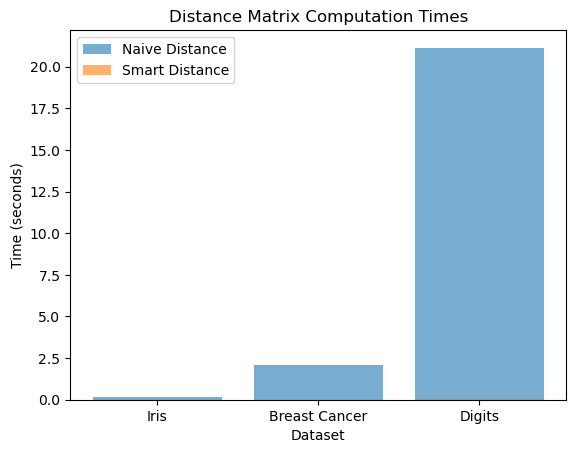

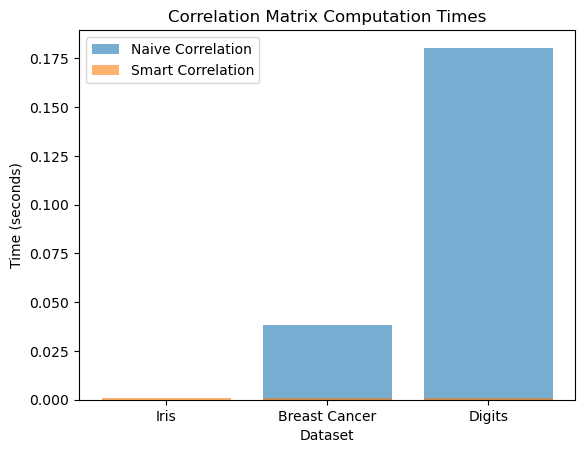

In [38]:
datasets = ['Iris', 'Breast Cancer', 'Digits']
naive_distance_times = [iris_naive_distance_time, breast_naive_distance_time, digits_naive_distance_time]
smart_distance_times = [iris_smart_distance_time, breast_smart_distance_time, digits_smart_distance_time]
naive_corr_times = [iris_naive_corr_time, breast_naive_corr_time, digits_naive_corr_time]
smart_corr_times = [iris_smart_corr_time, breast_smart_corr_time, digits_smart_corr_time]

# Plot for distance matrix
plt.bar(datasets, naive_distance_times, label='Naive Distance', alpha=0.6)
plt.bar(datasets, smart_distance_times, label='Smart Distance', alpha=0.6)
plt.xlabel('Dataset')
plt.ylabel('Time (seconds)')
plt.title('Distance Matrix Computation Times')
plt.legend()
plt.show()

# Plot for correlation matrix
plt.bar(datasets, naive_corr_times, label='Naive Correlation', alpha=0.6)
plt.bar(datasets, smart_corr_times, label='Smart Correlation', alpha=0.6)
plt.xlabel('Dataset')
plt.ylabel('Time (seconds)')
plt.title('Correlation Matrix Computation Times')
plt.legend()
plt.show()
